### Histórico de Dividendos

#### Bibliotecas

In [1]:
import pandas as pd                         
import matplotlib.pyplot as plt              
import numpy as np
import requests

#### Definindo Função

In [2]:
def proventos(codigo, arquivo=None):
    # --------------------------------------------
    # >> PASSO 1: BAIXAR OS DADOS DA INTERNET
    # --------------------------------------------
    url = 'https://www.fundamentus.com.br/proventos.php?papel=' + codigo + '&tipo=2'
    cabecalho = {              #informações para fingir ser um navegador
        "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebkit/537.36 (KHTML, like Gecko) \
        Chrome/50.0.2661.75 Safari/537.36",
        "x-Requested-With": "XMLHttpRequest" 
    }
    r = requests.get(url, headers=cabecalho)   # cria uma requisição com a URL e o cabeçalho
    dados_fundamentus = pd.read_html(r.text, decimal=',', thousands='.')[0] # faz a busca pelos dados na URL
    # --------------------------------------------
    # >> PASSO 2: MANIPULAÇÃO DOS DADOS
    # --------------------------------------------
    dados_fundamentus['Data'] = pd.to_datetime(dados_fundamentus['Data'], dayfirst=True)  # converte a data pro tipo datetime
    proventos = dados_fundamentus[['Data', 'Valor', 'Tipo']]  # cria um novo DataFrame com as colunas que interessam
    # criar coluna 'Val#### Definindo Funçãoor Líquido'
    proventos['Valor Líquido'] = np.where(proventos['Tipo']=='DIVIDENDO', proventos['Valor'], proventos['Valor']*0.85)
    # agrupar os proventos por anos
    proventos_agrupados = proventos.groupby(proventos['Data'].dt.year).sum()
    # --------------------------------------------
    # >> PASSO 3: EXIBIÇÃO DOS DADOS
    # --------------------------------------------
    plt.style.use('seaborn')   # define o estilo para o gráfico
    fig, ax = plt.subplots(figsize=(12,5))    # cria um espaço de tamanho 12x5 para o gráfico
    
    x = proventos_agrupados.index    # eixo horizontal (x): Índice do DataFrame (ano)
    y = proventos_agrupados['Valor Líquido']    # eixo vertical (y): Coluna 'Valor Líquido'
    
    plt.bar(x, y)   # plota o gráfico de barras
    plt.axis([min(x)-1, max(x)+1, 0, max(y)*1.1])   # define a escala do gráfico
    ax.ticklabel_format(useOffset=False)    # remove a notação científica da escala do gráfico
    ax.set_title('Proventos pagos por ação nos últimos anos')   # título do gráfico
    ax.set_ylabel('Proventos em R$')    # legenda para o eixo vertical (y)
    
    if arquivo is not None:
        plt.savefig(arquivo)    # se o nome do arquivo foi fornecido, salva o gráfico
    else:
        plt.show()              # caso contrário, exibe o gráfico na tela

C:\Users\eduardo.ramos\AppData\Local\Temp\ipykernel_7780\3474197084.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  proventos['Valor Líquido'] = np.where(proventos['Tipo']=='DIVIDENDO', proventos['Valor'], proventos['Valor']*0.85)
C:\Users\eduardo.ramos\AppData\Local\Temp\ipykernel_7780\3474197084.py:21: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  proventos_agrupados = proventos.groupby(proventos['Data'].dt.year).sum()
C:\Users\eduardo.ramos\AppData\Local\Temp\ipykernel_7780\3474197084.py:25: MatplotlibDeprecationWarning: The seaborn styles shipped by

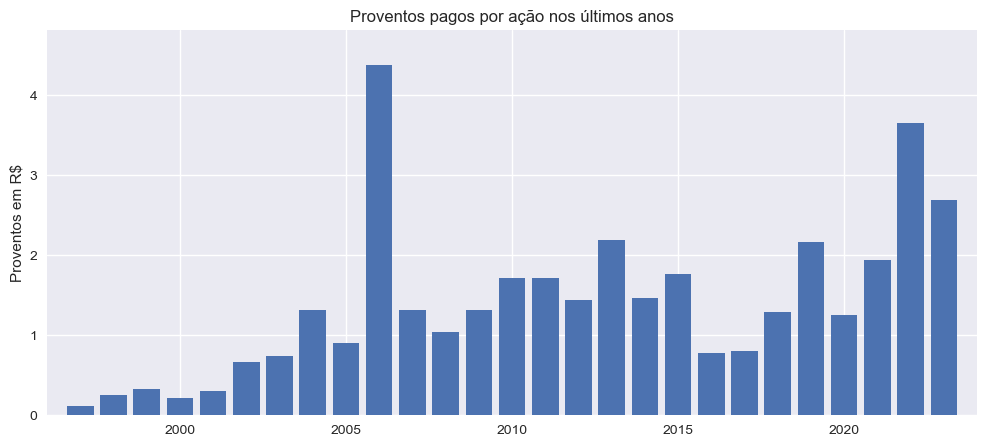

In [3]:
proventos('BBAS3')